# Gravitational Waves Data Preprocessing 


In [270]:
#Requiered libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries, TimeSeriesDict
from gwpy.plot import Plot
from gwpy.frequencyseries import FrequencySeries

- ## Helper Functions

In [3]:
#Function Purpose to Load Data given a path
def loadData(path):
    data = np.load(path) 
    return data

In [4]:
#Function Purpose to return a labeled Data Frame of the Gravitational waves Time Series Data Frame
def createTSDataFrame(sample_data):
    labels = ['LIGO Hanford', 'LIGO Livingston', 'Virgo' ]
    df = pd.DataFrame(sample_data)
    df.index = labels
    return df 

In [5]:
#Function Purpose to return each time series object represented in the npy array, give Time Series Data
def read_ts_file(Time_Series_Data): 
    ts1 = TimeSeries(Time_Series_Data[0,:], sample_rate =2048)
    ts2 = TimeSeries(Time_Series_Data[1,:],sample_rate =2048)
    ts3 = TimeSeries(Time_Series_Data[2,:],sample_rate =2048)
    return  ts1, ts2, ts3

In [345]:
#Function to plot all 3 Time series individually
def plot_data(ts1, ts2, ts3):
    plot = Plot(ts1, ts2, ts3, separate=True, sharex=True, figsize=[12, 6])
    ax = plt.gca()   
    ax.set_xlim(0,2)
    plot.axes[0].set_xlabel('Time [s]')
    plot.axes[0].set_ylabel('GW Amplitude')
    plot.axes[1].set_xlabel('Time [s]')
    plot.axes[1].set_ylabel('GW Amplitude')
    plot.axes[2].set_xlabel('Time [s]')
    plot.axes[2].set_ylabel('GW Amplitude')
    plot.show()

In [346]:
#Ploting all time series in one plot
def plot_data_jointly(ts1, ts2, ts3):  
    plot = Plot(figsize=(15, 9))
    ax = plot.add_subplot(xscale='auto-gps')
    ax.plot(ts1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
    ax.plot(ts2, color='gwpy:ligo-livingston', label='LIGO-Livingston')
    ax.plot(ts3, color='gwpy:virgo', label='Virgo')
    ax.set_xlim(0, 2)
    ax.set_ylabel('Gravitational Waves Amplitude')
    ax.set_title("Joint Plot of Time Series")
    ax.legend()
    plot.show()

- ##  Ploting Time Series Sample Data

In [347]:
#Loading sample data from given path
path1_signal = "../../../Group Project/data/train/0/0/0/000a1f352b.npy" #Signal
path_no_signal = "../../../Group Project/data/train/0/0/0/00001f4945.npy" #No Signal

sample_data_signal = loadData(path1_signal)
sample_no_signal = loadData(path_no_signal)

In [348]:
#Storing each timeseries (from each device), for both timeseries with a signal and no signal
ts_signal1,  ts_signal2,  ts_signal3 = read_ts_file(sample_data_signal)
ts_no_signal1,  ts_no_signal2,  ts_no_signal3 = read_ts_file(sample_no_signal)

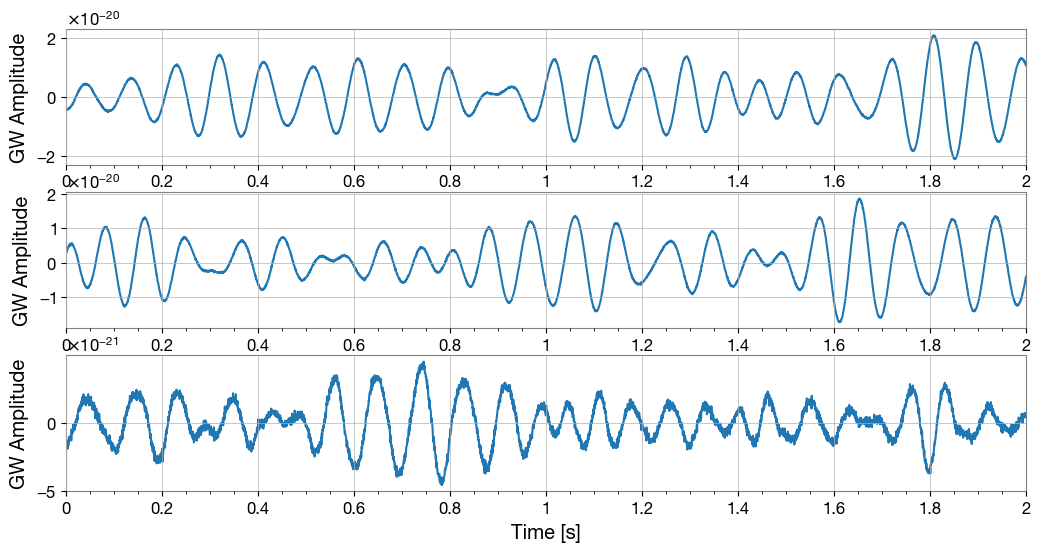

In [349]:
#ploting time Series with signal
plot_data(ts_signal1,  ts_signal2,  ts_signal3)

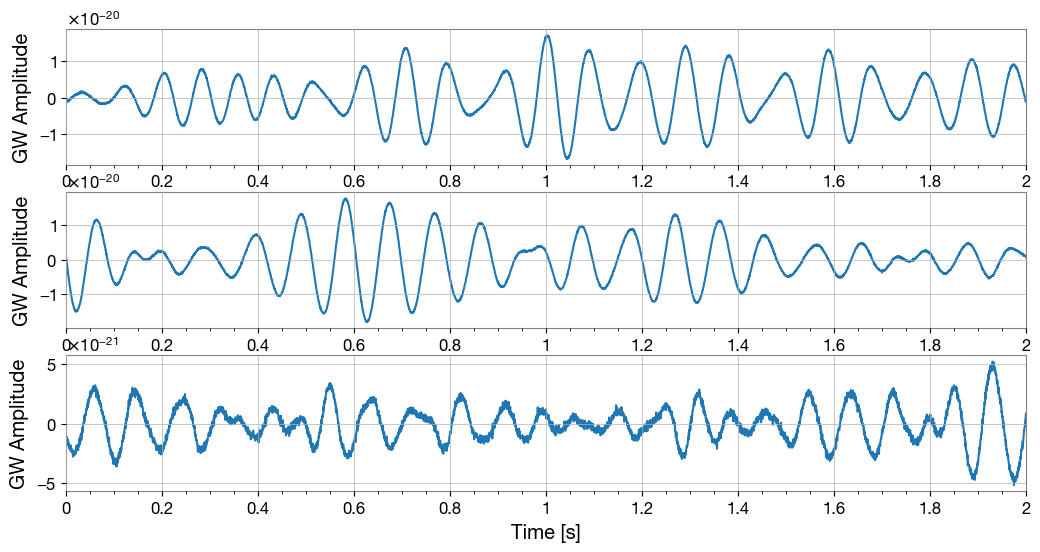

In [350]:
#ploting time Series without a signal
plot_data(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

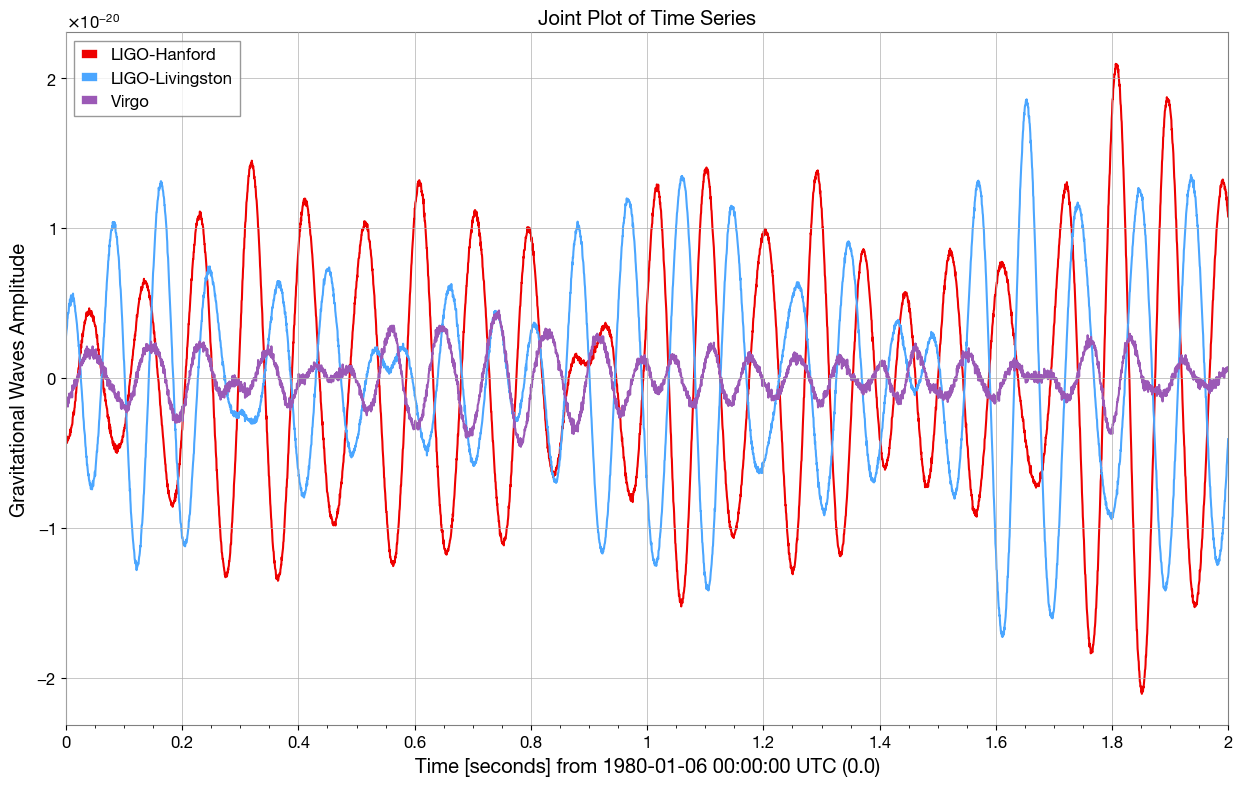

In [308]:
#Joint plot of time series with a signal
plot_data_jointly(ts_signal1,  ts_signal2,  ts_signal3)

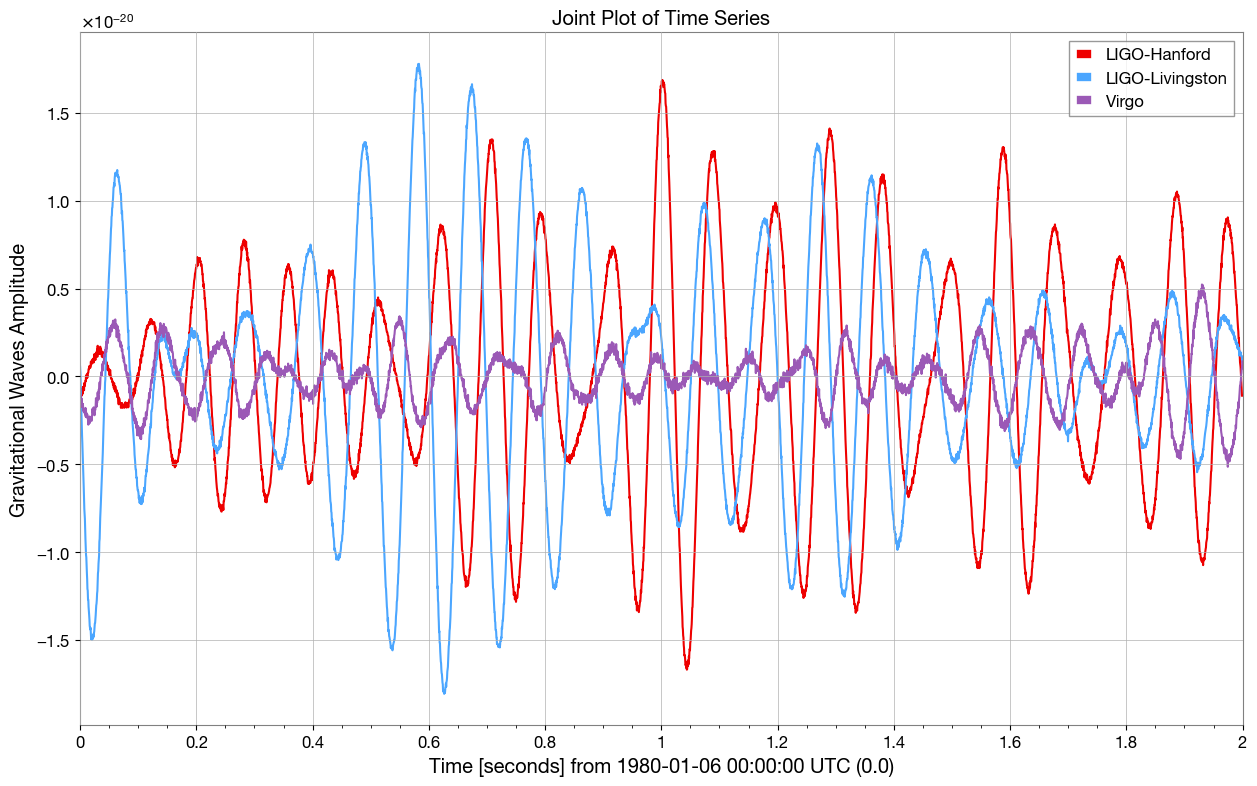

In [309]:
#Joint plot of time series without a signal
plot_data_jointly(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

- <font size = 4> We observe there is no visual diffrence, between a timeseris file with or withouth a signal.

- ## Generating a FrequencySeries

In [262]:
#Calculating the spectrum(Setting the Fourier Transformm Time domain to 2 seconds)
def calculateAsdSpectrum(ts1,ts2,ts3):
    spectrum1 = ts_signal1.asd(2,1)
    spectrum2 = ts_signal2.asd(2,1)
    spectrum3 = ts_signal3.asd(2,1)
    return spectrum1, spectrum2, spectrum3

In [263]:
#Storing calculated spectrum into variables for plotting
spectrum1, spectrum2, spectrum3 = calculateAsdSpectrum(ts_signal1,ts_signal1,ts_signal1)

In [360]:
#Function to plot the auto spectral density 
def asdSpctrumPlot(spectrum1,spctrum2, spectrum3): 
    plot1 = spectrum1.plot()
    plot2 = spectrum2.plot()
    plot3 = spectrum3.plot()
    ax = plot.gca()
    ax.set_xlim(0, 2048)
    ax.set_xlim(0, 2000)
    plot1.axes[0].set_ylabel('GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
    plot2.axes[0].set_ylabel('GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
    plot3.axes[0].set_ylabel('GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
    ax.set_ylim(1e-23, 3e-20)
    plot1.show() 
    plot2.show()
    plot3.show()

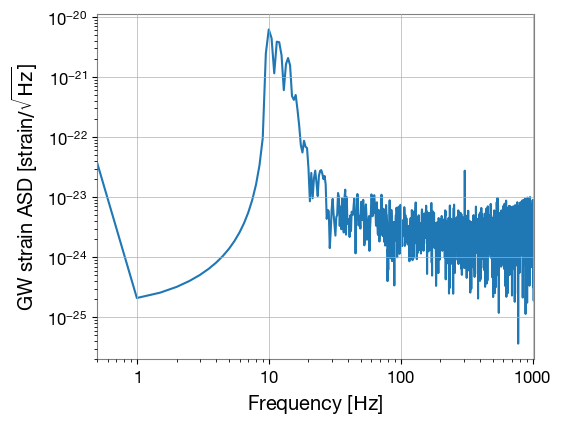

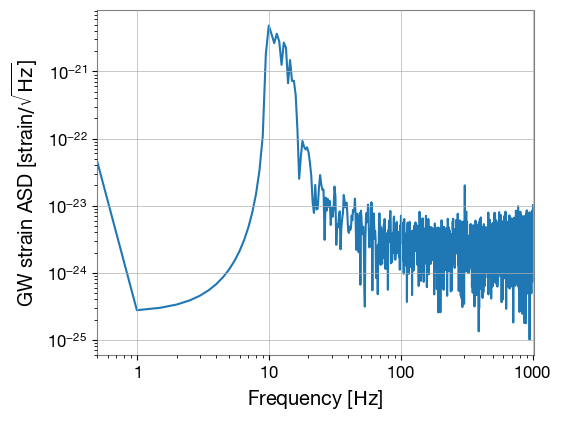

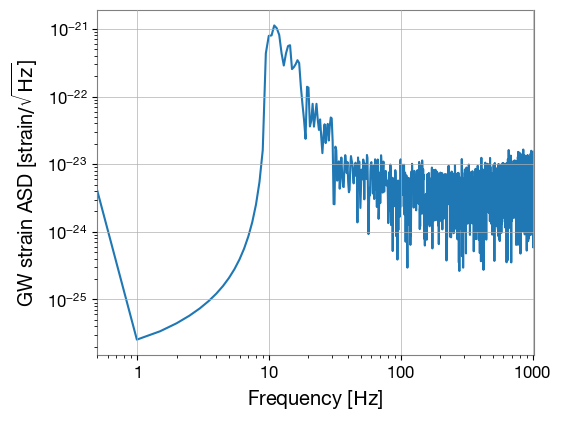

In [361]:
# Ploting Frequency Series
asdSpctrumPlot(spectrum1, spectrum2, spectrum3)

- ## Whitening

In [223]:
#Function to whiten the TimeSeries data
def whitenTimeSeries(ts1,ts2,ts3):
    ts1_whiten = ts1.whiten(2,1)
    ts2_whiten = ts2.whiten(2,1)
    ts3_whiten = ts3.whiten(2,1)
    return ts1_whiten, ts2_whiten, ts2_whiten

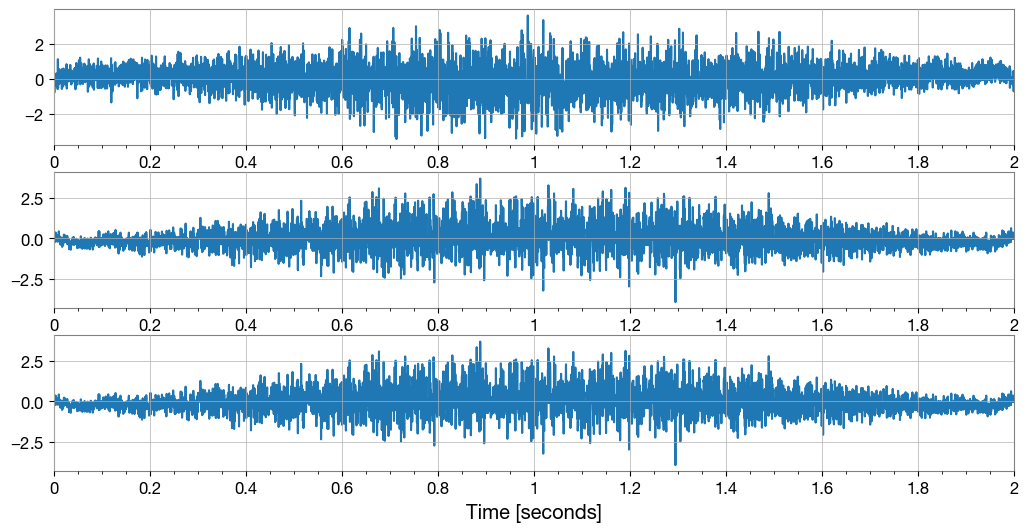

In [312]:
#Storing Whiten Time Series In Variables, and Ploting
ts1_whiten, ts2_whiten, ts2_whiten = whitenTimeSeries(ts_signal1,ts_signal2,ts_signal3)
plot_data(ts1_whiten, ts2_whiten, ts2_whiten)

- ## Q transform

In [332]:
def qSpectrogramPlot(ts):
    qspecgram =ts.q_transform(outseg=(0.5, 1.5))
    plot = qspecgram.plot(figsize=[16, 8])
    ax = plot.gca()
    ax.set_xscale('seconds')
    ax.set_yscale('log')
    ax.set_ylim(0,650)
    ax.set_ylabel('Frequency [Hz]')
    ax.grid(True, axis='y', which='both')
    ax.colorbar(cmap='viridis', label='Normalized energy')
    plot.show()

/var/folders/yx/sqtjt7tj60zc4gdw10f4yq1c0000gp/T/ipykernel_1556/1111839587.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,650)


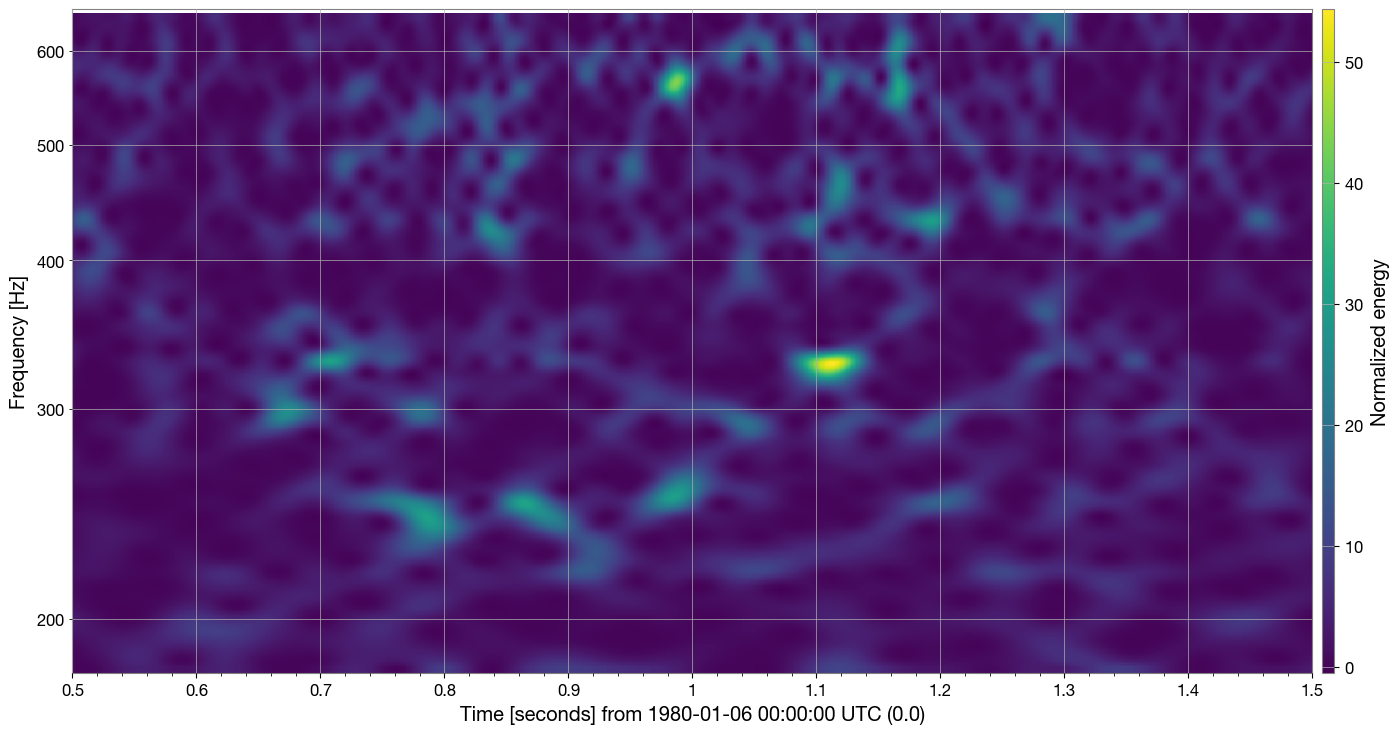

In [333]:
# Q transform Spectrogram Gravitatntional Wave time series without a signal
qSpectrogramPlot(ts_no_signal1)

/var/folders/yx/sqtjt7tj60zc4gdw10f4yq1c0000gp/T/ipykernel_1556/1111839587.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,650)


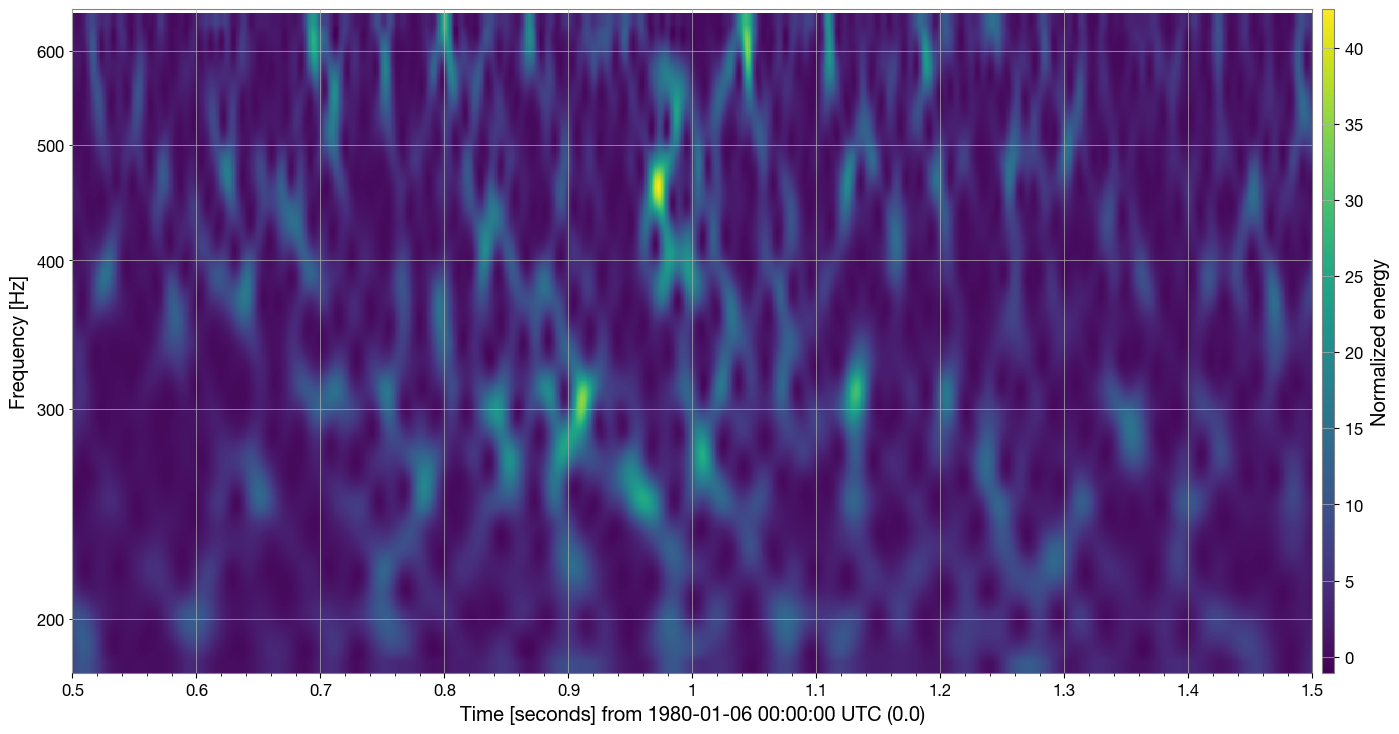

In [337]:
# Q transform Spectrogram Gravitatntional Wave time series with a signal
qSpectrogramPlot(ts_signal1)

- ##  Filtering a TimeSeries with a ZPK filter